In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
path = "hotel_bookings.csv"
df = pd.read_csv(path)
df



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Limpieza de datos (EDA)
# SE OBSERVA QUE HAY VALORES FALTANTES EN LAS COLUMNAS DE LA TABLA
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [32]:
df['country'].value_counts()
 # Contar valores nulos en la columna 'country'

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 177, dtype: int64

In [34]:
df["agent"].isnull().sum()

np.int64(16340)

In [35]:
df["company"].isnull().sum()

np.int64(112593)

In [36]:
# Mostrar las columnas con valores faltantes y la cantidad de valores faltantes en cada una
missing_cols = df.columns[df.isnull().any()]
df[missing_cols].isnull().sum()

children         4
country        488
agent        16340
company     112593
dtype: int64

In [ ]:
# Rellenar la columna children con valor 0 de City Hotel
df.loc[
    (df['hotel'] == 'City Hotel') &
    (df['children'].isna()),
    'children'] = 0

# Mostar nuevamente las columnas con valores faltantes debido a que se ha rellenado la columna children del  City Hotel
missing_cols = df.columns[df.isnull().any()]
df[missing_cols].isnull().sum()

country       488
agent       16340
company    112593
dtype: int64

In [ ]:
# Explicacion : La columna company tiene valores nulos , la cantidad de datos nulos es de 488 , 
# por lo cual se procede con el relleno de los datos , es decir que  se reemplazará el valor nulo por 0 y se interpretará como que no existe una empresa asociada.
df['company'].fillna(0, inplace=True)

# se vuelve a ejecutar el codigo anterior para verificar que la columna company ya no tiene valores nulos
missing_cols = df.columns[df.isnull().any()]
df[missing_cols].isnull().sum()


C:\Users\mico1\AppData\Local\Temp\ipykernel_21464\307222520.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company'].fillna(0, inplace=True)


country      488
agent      16340
dtype: int64

In [ ]:
# Se rellena los valores nulos en la columna 'country' con 'Desconocido'
# Este rellenado ayuda a conservar las filas en las que no se registró el país del cliente
df['country'].fillna("Desconocido", inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [46]:
# se vuelve a ejecutar el codigo anterior para verificar que la columna company ya no tiene valores nulos
missing_cols = df.columns[df.isnull().any()]
df[missing_cols].isnull().sum()

agent    16340
dtype: int64

In [48]:
# Se procede con el rellenado los valores nulos en la columna 'agent' con 0
# Esto  es debido a que se indica que la reserva no fue realizada por un agente
df['agent'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

C:\Users\mico1\AppData\Local\Temp\ipykernel_21464\1758190380.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(0, inplace=True)


In [ ]:
# la columna children estaba en float  y se convierte a integer para evitar problemas en el análisis posterior
df['children'] = df['children'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [57]:
diccionario  = {
    "hotel": "Hotel",
    "adults":"Adults",
    "children":"Children",
    "babies":"Babies",
    "meal":"Meal",
    "country":"Country",
    "is_canceled":"Is Canceled"
  }

df.rename(columns=diccionario, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Hotel                           119390 non-null  object 
 1   Is Canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   Adults                          119390 non-null  int64  
 10  Children                        119390 non-null  int64  
 11  Babies                          119390 non-null  int64  
 12  Meal            

In [ ]:
# Reemplazar 0 por 'No' y 1 por 'Sí' en la columna is_canceled
df['Is Canceled'] = df['Is Canceled'].replace({0: 'No', 1: 'Sí'})

# Revisar los cambios
df['Is Canceled'].value_counts()

Is Canceled
No    75166
Sí    44224
Name: count, dtype: int64

In [23]:
# Reemplazar valor indefinido en la columna 'meal' por SC (Sin Comida)
# Se interpreta que 'Undefined' significa que no se ha seleccionado un plan de comidas
# Se reemplaza por 'SC' para indicar que no hay comida incluida en plan del cliente
df['meal'] = df['meal'].replace('Undefined', 'SC')
# Revisar los cambios
df['meal'].value_counts()

meal
BB    92310
HB    14463
SC    11819
FB      798
Name: count, dtype: int64

In [ ]:
# Se modifica lo nombres de algunas columnas por medio de un diccionario
# Esto es para que los nombres de las columnas sean más descriptivos y fáciles de entender
diccionario_2 = {
    "agent": "Agent",
    "booking": "Booking",
     "adr": "Average Daily Rate",
     "market_segment": "Market Segment",
}

df.rename(columns=diccionario_2, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Hotel                           119390 non-null  object 
 1   Is Canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   Adults                          119390 non-null  int64  
 10  Children                        119390 non-null  int64  
 11  Babies                          119390 non-null  int64  
 12  Meal            

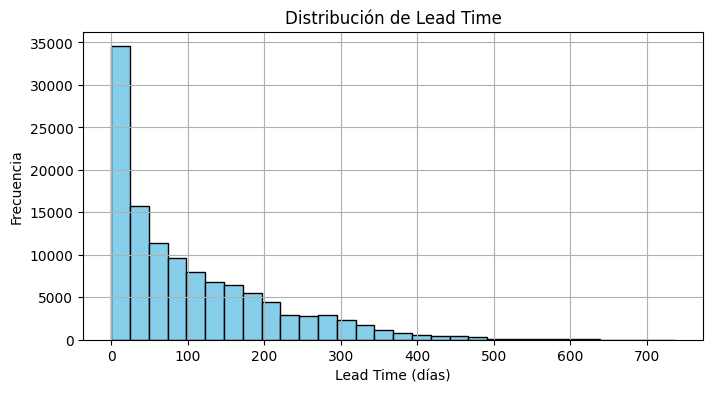

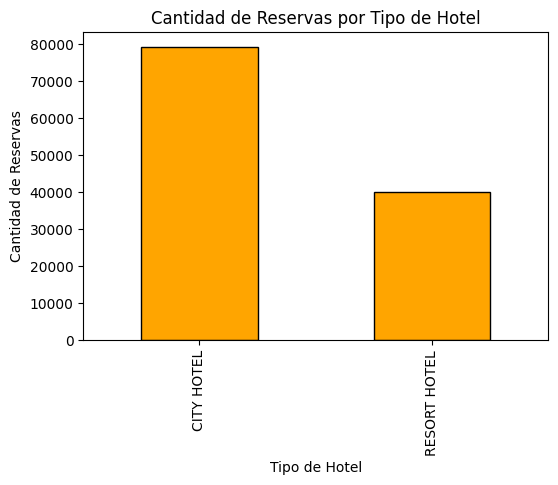

In [ ]:
#  Histograma de los plazos de reservas'
plt.figure(figsize=(8, 4))
df['lead_time'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Lead Time')
plt.xlabel('Lead Time (días)')
plt.ylabel('Frecuencia')
plt.show()
# Analisis del histograma:
# La mayoría de las reservas se realizan con poca anticipación, aunque existen algunos de plazos de reservas muy alto.

# Gráfico de barras de los tipos de hotel
plt.figure(figsize=(6, 4))
df['Hotel'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Cantidad de Reservas por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad de Reservas')
plt.show()
# Analisis del grafico de barras:
# El tipo de hotel con mayor cantidad de reservas es el City Hotel, seguido por Resort Hotel.

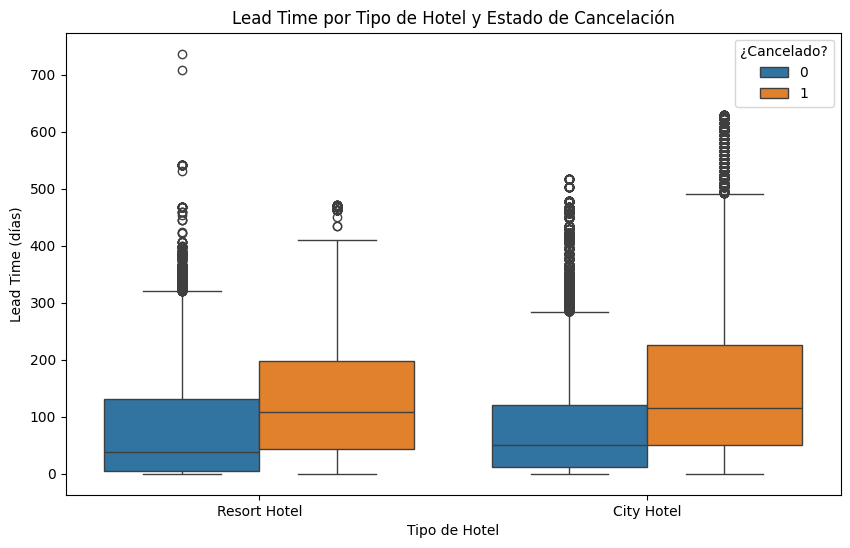

C:\Users\mico1\AppData\Local\Temp\ipykernel_20816\2704175319.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='market_segment', y='adr', hue='hotel', ci=None)


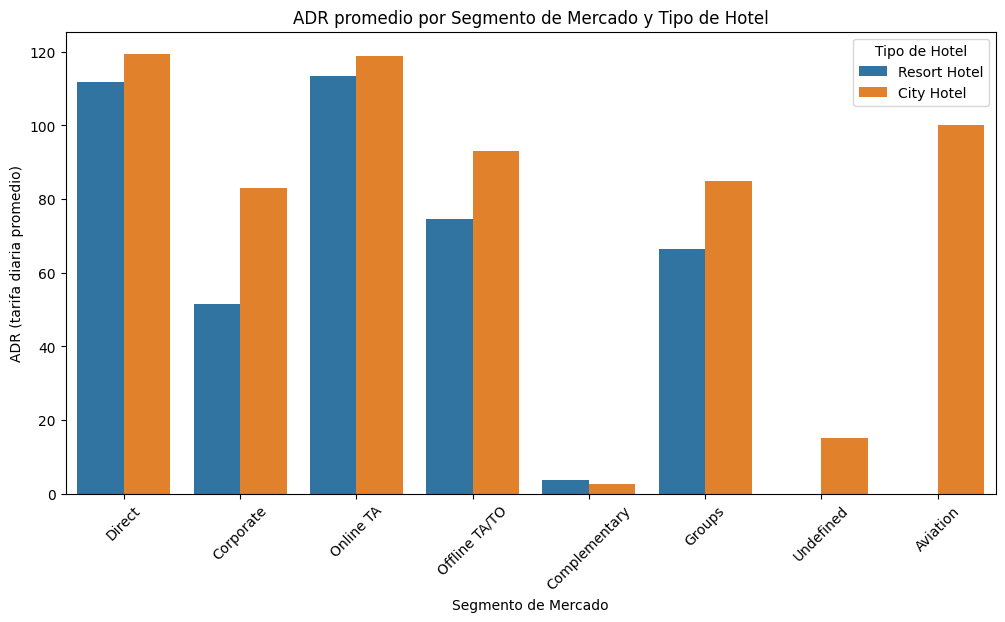

In [ ]:
# Visualización 1: Relación entre el tipo de hotel, el estado de cancelación y el promedio de lead_time
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='hotel', y='lead_time', hue='is_canceled')
plt.title('Lead Time por Tipo de Hotel y Estado de Cancelación')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Lead Time (días)')
plt.legend(title='¿Cancelado?')
plt.show()
# Interpretación:
# Se observa que las reservas canceladas tienden a tener un lead time (anticipación) mayor en ambos tipos de hotel,
# especialmente en el City Hotel. Esto sugiere que las reservas hechas con mucha anticipación tienen mayor probabilidad de cancelarse.

# Visualización 2: Relación entre el segmento de mercado, el tipo de hotel y el ADR (tarifa diaria promedio)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='market_segment', y='adr', hue='hotel', ci=None)
plt.title('ADR promedio por Segmento de Mercado y Tipo de Hotel')
plt.xlabel('Segmento de Mercado')
plt.ylabel('ADR (tarifa diaria promedio)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Hotel')
plt.show()
# Ianalisis del grafico:
# El segmento de mercado influye significativamente en el ADR, y existen diferencias notables entre los tipos de hotel.
# Por ejemplo, el segmento "Corporate" suele tener un ADR más alto en el City Hotel que en el Resort Hotel.

In [ ]:
# Estadísticas descriptivas para las variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Reservas por tipo de hotel:
 hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

Estado de cancelación de reservas:
 is_canceled
0    75166
1    44224
Name: count, dtype: int64

Estadísticas de lead_time:
 count    119390.00
mean        104.01
std         106.86
min           0.00
25%          18.00
50%          69.00
75%         160.00
max         737.00
Name: lead_time, dtype: float64

Estadísticas de ADR:
 count    119390.00
mean        101.83
std          50.54
min          -6.38
25%          69.29
50%          94.58
75%         126.00
max        5400.00
Name: adr, dtype: float64

Reservas por segmento de mercado:
 market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64


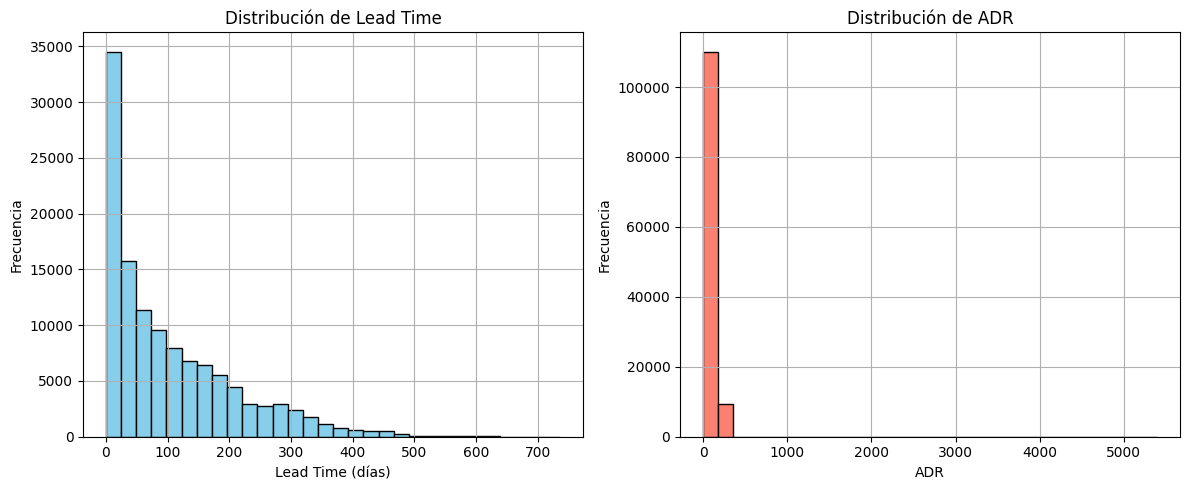

In [25]:
# Identificación de tendencias en los datos

# 1. Tendencia en el tipo de hotel
hotel_counts = df['hotel'].value_counts()
print("Reservas por tipo de hotel:\n", hotel_counts)

# 2. Tendencia en cancelaciones
cancel_counts = df['is_canceled'].value_counts()
print("\nEstado de cancelación de reservas:\n", cancel_counts)

# 3. Tendencia en anticipación de reserva
lead_time_desc = df['lead_time'].describe().round(2)
print("\nEstadísticas de lead_time:\n", lead_time_desc)

# 4. Tendencia en la tarifa diaria promedio
adr_desc = df['adr'].describe().round(2)
print("\nEstadísticas de ADR:\n", adr_desc)

# 5. Tendencia en segmento del mercado
market_counts = df['market_segment'].value_counts()
print("\nReservas por segmento de mercado:\n", market_counts)

# 6. Visualización rápida de la distribución de lead_time y ADR
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['lead_time'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Lead Time')
plt.xlabel('Lead Time (días)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
df['adr'].hist(bins=30, color='salmon', edgecolor='black')
plt.title('Distribución de ADR')
plt.xlabel('ADR')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#  Analisis :
# - La mayoría de las reservas se realizan en City Hotel.
# - Hay una proporción considerable de reservas canceladas.
# - La mayoría de las reservas se hacen con poca anticipación, pero existen valores atípicos con mucha anticipación.
# - El ADR presenta una distribución sesgada, con la mayoría de tarifas en un rango bajo, pero algunos valores muy altos.
# - El segmento de mercado dominante es "Online TA", seguido de "Offline TA/TO".

In [ ]:
# Conclusiones finales de los gráficos y análisis realizados:

1. La mayoría de las reservas se realizan en el City Hotel, lo que indica una mayor popularidad o capacidad respecto al Resort Hotel.
2. Existe una proporción considerable de reservas canceladas, especialmente aquellas realizadas con mucha anticipación (lead time alto).
3. El segmento de mercado dominante es 'Online TA', seguido de 'Offline TA/TO', lo que resalta la importancia de los canales en línea para las reservas hoteleras.
4. La mayoría de las reservas se hacen con poca anticipación, aunque existen valores atípicos con reservas realizadas con mucha antelación.
5. El ADR (tarifa diaria promedio) presenta una distribución sesgada, con la mayoría de tarifas en un rango bajo, pero algunos valores muy altos.
6. El segmento de mercado y el tipo de hotel influyen significativamente en el ADR, mostrando diferencias notables entre grupos de clientes.
7. Los datos muestran la importancia de la gestión de cancelaciones y la segmentación de mercado para la toma de decisiones en la industria hotelera.

#Conclusiones generales :
En general, el análisis evidencia la relevancia de comprender el comportamiento de las reservas, cancelaciones y segmentos de mercado para optimizar la gestión hotelera. La anticipación en las reservas, la distribución de tarifas y la importancia de los canales en línea son factores clave que pueden guiar estrategias comerciales, de precios y de fidelización de clientes. La correcta gestión de los datos y su análisis permiten identificar oportunidades de mejora y tomar decisiones informadas para maximizar la ocupación y rentabilidad del hotel.
